 Tomé este Data Set de Kaggle, el cual muestra los datos de ventas en plataformas digitales
https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data

OBSERVACIONES DEL DATASET:
Hay diferentes tipos de valores en la columna 'Sales Channel' (Comerciante y Amazon), que se pueden explorar más a fondo para ver si hay algún patrón.
La columna "Fulfilled-by" tiene valores como Easy Ship y NaN, lo que sugiere que Amazon realiza algunos pedidos, mientras que otros los realizan los comerciantes.
La columna 'Fulfilment' tiene solo dos valores, 0 y 1, que podrían representar pedidos completados o no completados.
La columna "Amount" tiene valores en INR (rupias indias), lo que indica que los datos están relacionados con una plataforma de comercio electrónico india.
los campos son 

**Nombre 	   Descripción	       Tipo de dato**
Category:	   Tipo de producto.	   (String)
Size:	       Tamaño del producto	 (String)
Date:	       Fecha de la venta	   (Date)
Status:      Estado de la venta	   (String)
Fulfilment:  Forma de cumplimiento (String)
Style:       Estilo del producto.	 (String)
SKU:	       Stock Keeping Unit.	 (String)
ASIN:  	     N° Id standard de Amazon	(String)
Courier Status:	Estado del transportista	(String)
Qty:	       Cantidad del producto	  (Integer)
Amount:  	   Importe de venta	     (Float)
B2B:    	   Business to business sale.	(Boolean)
Currency:	   Moneda de la venta	   (String)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm   # necesito acceder a la clase OLS para ajustar el modelo

#Importamos todas las librerías que vamos a necesitar

Ahora procedo a cargar los datos y a tener una pequeña muestra del contenido del Data Set.

In [2]:
df = pd.read_csv('AmazonSaleReport.csv')
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_25668\2708334345.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AmazonSaleReport.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


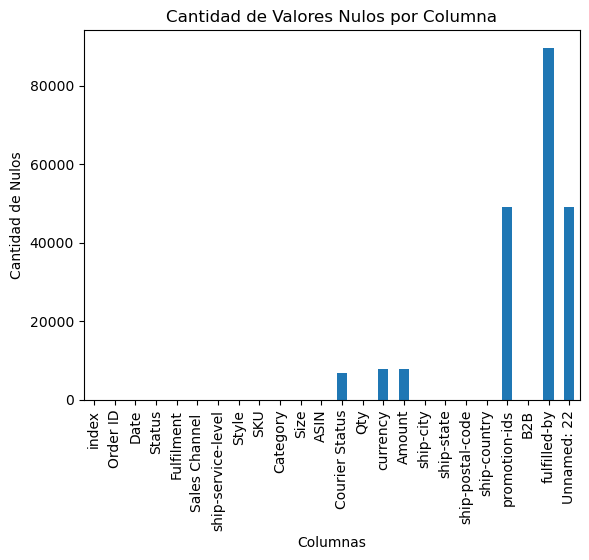

In [5]:
# Cuento los valores nulos por columna
null_counts = df.isnull().sum()

# Creo un gráfico de barras
null_counts.plot(kind='bar')

# Configuro el título y los ejes del gráfico
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Nulos')

# Muestro el gráfico
plt.show()


Podemos ve que 3 columnas ocupan la mayor cantidad de valores nulos del Dataset ("Fulfilled-by habría que eliminarla por no aportar valor al análisis)

Procedemos a mostrar con la librería "seaborn" la cantidad de Categorías distintas que hay y la concentración que tiene cada uno.

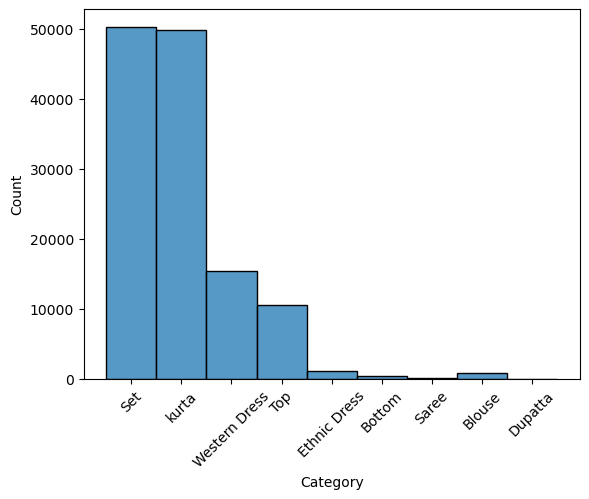

In [6]:

sns.histplot(x='Category', data=df)
# Se rotan las etiquetas a 45 grados para que no se superpongan 
plt.xticks(rotation=45);

Aquí podemos ver que las categorias "Set" y "Kurta" concentran la mayor parte de los valores.

Busco visualizar el monto de lo facturado acumulado dependiendo si es B2B o no.

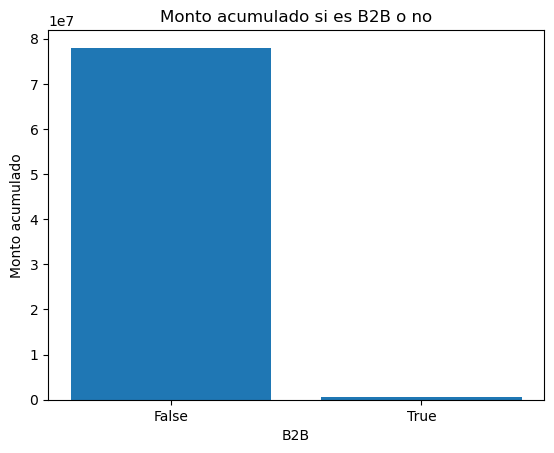

In [9]:
city_totals = df.groupby('B2B')['Amount'].sum()
plt.bar(city_totals.index, city_totals.values)
#Renombro las etiquetas utilizando esta funcion
plt.xticks(city_totals.index, labels=[False, True])
plt.xlabel('B2B')
plt.ylabel('Monto acumulado')
plt.title('Monto acumulado si es B2B o no')
plt.show()

Muestro la proporción que tiene la variable "ship-service-lebel" con un gráfico de Torta.

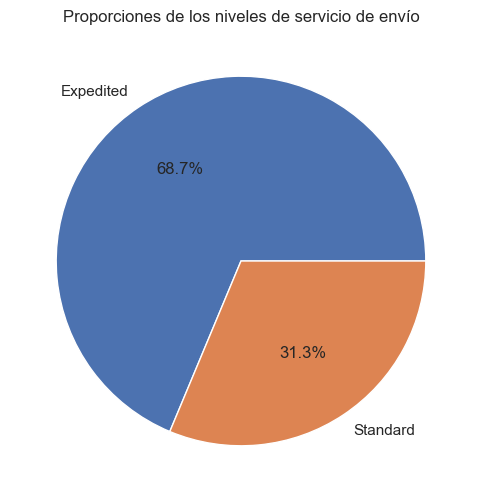

In [10]:

sns.set(style="darkgrid")

# Cuento las frecuencias de cada nivel de servicio
level_counts = df['ship-service-level'].value_counts()

# Creo un gráfico de torta para mostrar la proporción
plt.figure(figsize=(6,6))
plt.pie(level_counts.values, labels=level_counts.index, autopct='%1.1f%%')
plt.title('Proporciones de los niveles de servicio de envío')
plt.show()


La mayor parte de los pedidos son enviados con la calidad de "Expedited" (Urgentes) 68,7% y el 31,3% restante de los pendidos son entregados en el formato de tiempo Standard del servicio.

Quiero visualizar cómo son las ventas acumuladas por país y su evolución en el tiempo.

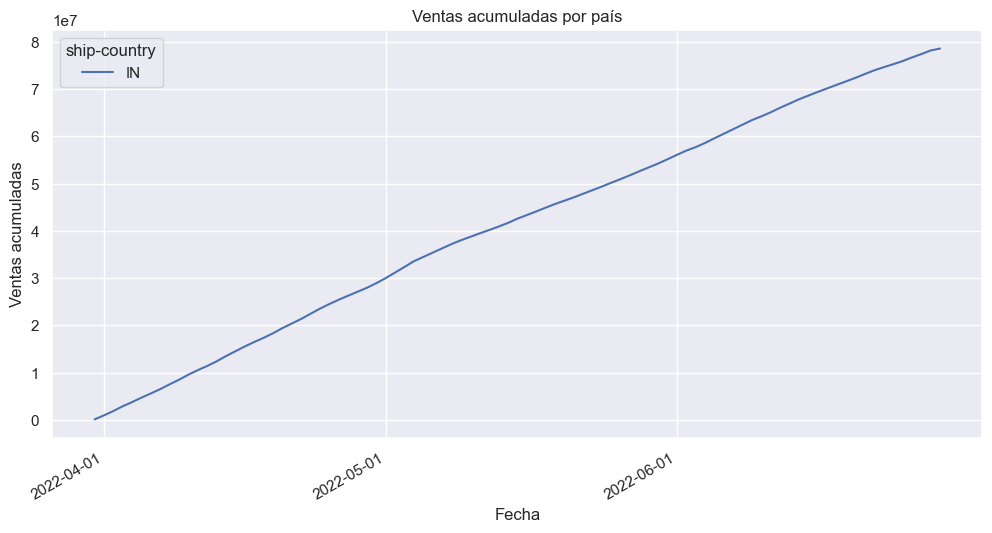

In [11]:

# Convierto la columna "Date" a datetime
df['Date'] = pd.to_datetime(df['Date'])

# Calculo las ventas acumuladas por país y fecha
agrupado = df.groupby(['ship-country', 'Date'])['Amount'].sum().groupby(level=[0]).cumsum().reset_index()

# Ajusto el intervalo de las fechas a mostrar
fecha_inicio = agrupado['Date'].min()
fecha_final = agrupado['Date'].max()
# Al tener los extremos conozco el reango y le pido me muestre los valores acumulados por mes.
intervalo_fechas = pd.date_range(fecha_inicio, fecha_final, freq='MS')

# Creo el gráfico
sns.set(style='darkgrid')
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Amount', hue='ship-country', data=agrupado)
plt.title('Ventas acumuladas por país')
plt.xlabel('Fecha')
plt.ylabel('Ventas acumuladas')
# Roto las etiquetas del eje "x" 45 grados para que no se superpongan
plt.xticks(intervalo_fechas, rotation=45)
plt.gcf().autofmt_xdate()
plt.show()




Solo me muestra un solo país y las ventas en estos 3 meses solo corresponden a India "IN"

In [12]:
# Valido que no haya otro país que no sea mostrado por el gráfico
paises = df['ship-country'].value_counts()
print(paises)


IN    128942
Name: ship-country, dtype: int64


Solo hay un País en el Data Set "India" y por esto la visualización no es muy útil, salvo para ver la evolución creciente de las ventas.

Busco si hay relación entre la fecha y el estado del pedido para saber si hay retraso en las entregas en algún momento del mes.

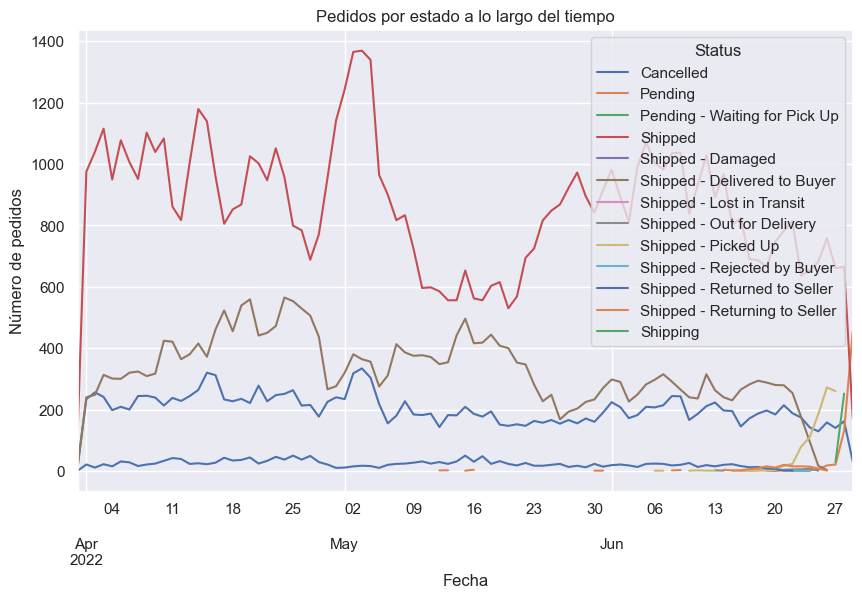

In [13]:
# Contar los pedidos por estado y fecha
grouped = df.groupby(['Status', 'Date']).size().unstack('Status')

# Graficar el número de pedidos por estado a lo largo del tiempo
grouped.plot(figsize=(10, 6), title='Pedidos por estado a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de pedidos')
plt.show()


Busco una realción entre la fecha del pedido y el canal para saber si hay preferencias en la compra dependiendo del momento del mes.

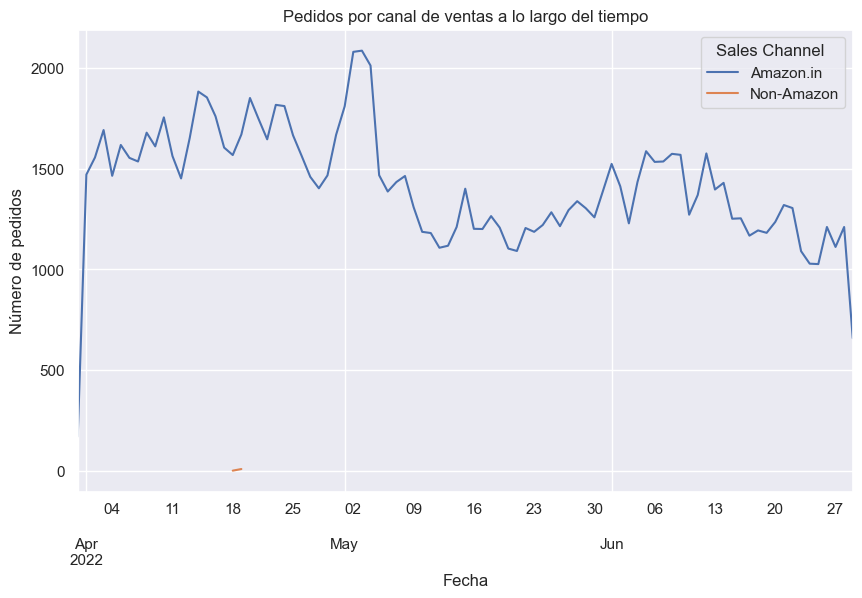

In [18]:
# Cuento los pedidos por canal de ventas y fecha
grouped = df.groupby(['Sales Channel ', 'Date']).size().unstack('Sales Channel ')

# Grafico el número de pedidos por canal de ventas a lo largo del tiempo
grouped.plot(figsize=(10, 6), title='Pedidos por canal de ventas a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de pedidos')
plt.show()

Casi la totalidad de los pedidos son recibidos a través del canal de ventas AMAZON

Regresión lineal para determinar cómo la fecha, el canal de ventas y el precio del producto afectan las ventas totales

In [19]:
# Creo una variable para el mes y el año de cada pedido
df['YearMonth'] = df['Date'].dt.strftime('%Y-%m')

# Calculo las ventas totales por mes y canal de ventas
grouped = df.groupby(['YearMonth', 'Sales Channel '])['Amount'].sum().reset_index()

# Creo una matriz de características con la fecha, el canal de ventas y el precio del producto
X = pd.get_dummies(grouped[['YearMonth', 'Sales Channel ']], drop_first=True)
X['Amount'] = grouped['Amount']

# Ajusto un modelo de regresión lineal
model = sm.OLS(X['Amount'], sm.add_constant(X.drop('Amount', axis=1)))
result = model.fit()

# Imprimo los resultados
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     80.42
Date:                Mon, 19 Jun 2023   Prob (F-statistic):             0.0123
Time:                        18:39:29   Log-Likelihood:                -106.80
No. Observations:                   7   AIC:                             223.6
Df Residuals:                       2   BIC:                             223.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

c:\Users\hp\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


El modelo de regresión tiene un buen ajuste (R2 = 99,4%) y las variables independientes incluidas en el modelo están relacionadas de manera significativa con la variable dependiente. F-statistic: 80.42 y la probabilidad de F es : 0.0123.